In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

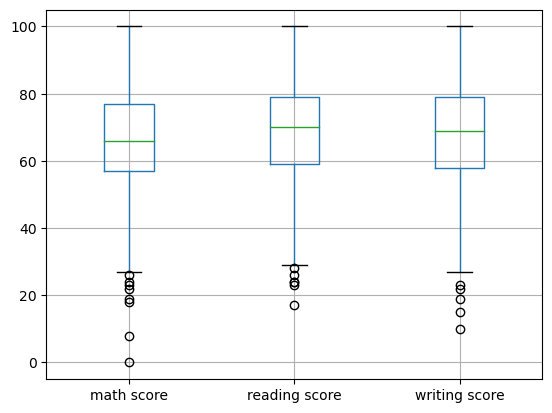

In [10]:
df.boxplot()

In [21]:
q1= df['math score'].quantile(0.25)
q3= df['math score'].quantile(0.75)
IQR = q3-q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

outliers = df[(df['math score'] < lower_bound) | (df['math score'] > upper_bound)]
outliers          

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [15]:
cleaned_df = df[(df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)]
cleaned_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


<Axes: >

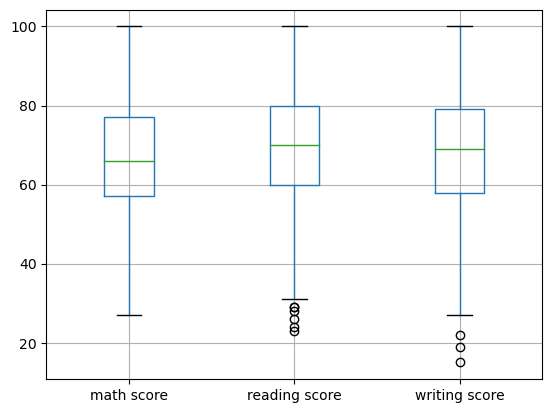

In [16]:
cleaned_df.boxplot()

In [25]:
cleaned_df['gender'].replace({'male': 1 , 'female': 0} ,inplace= True)
cleaned_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,99,95
996,1,group C,high school,free/reduced,none,62,55,55
997,0,group C,high school,free/reduced,completed,59,71,65
998,0,group D,some college,standard,completed,68,78,77


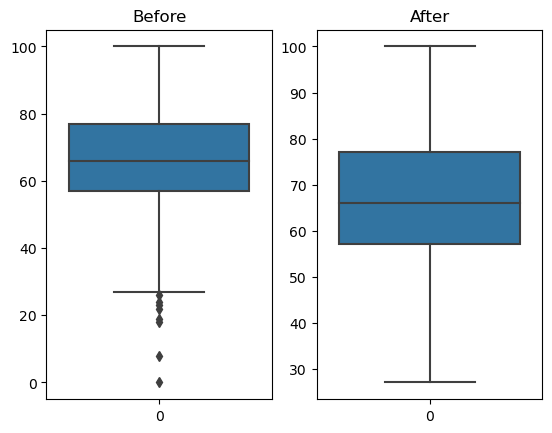

In [29]:
fig, axes= plt.subplots(1,2)
sns.boxplot(df['math score'], ax = axes[0])
axes[0].title.set_text('Before')
sns.boxplot(cleaned_df['math score'], ax = axes[1])
axes[1].title.set_text('After')
plt.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_df['reading score'] = scaler.fit_transform(cleaned_df[['reading score']])
cleaned_df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,0.636364,74
1,0,group C,some college,standard,completed,69,0.870130,88
2,0,group B,master's degree,standard,none,90,0.935065,93
3,1,group A,associate's degree,free/reduced,none,47,0.441558,44
4,1,group C,some college,standard,none,76,0.714286,75
...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,standard,completed,88,0.987013,95
996,1,group C,high school,free/reduced,none,62,0.415584,55
997,0,group C,high school,free/reduced,completed,59,0.623377,65
998,0,group D,some college,standard,completed,68,0.714286,77
